#### Jueves 8 de mayo de 2025

## Árbol de Decisión. ID3 ¿Llevar paraguas?

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
# Datos
dia = ['Lunes', 'Martes', 'Miercoles']
Nublado = ['Sí', 'No', 'Sí']
Humedad = ['Alta', 'Alta', 'Normal']
Viento = ['No', 'Sí', 'No']
LlevarParaguas = ['Sí', 'Sí', 'No']

In [4]:
# Codificamos 
# Nublado: Sí=1, No=0
# Humedad: Alta=1, Normal: 0
# Viento: Sí=1, No=0
# Llevar Paraguas = Sí=1, No=0

X = [[1, 1, 0], 
     [0, 1, 1], 
     [1, 0, 0]]

y = LlevarParaguas

In [5]:
# Modelo
modelo = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0
)
modelo.fit(X, y)

print("Profundidad real del árbol:", modelo.get_depth())
print("Número de hojas:", modelo.get_n_leaves())

Profundidad real del árbol: 1
Número de hojas: 2


### Árbol de Decisión

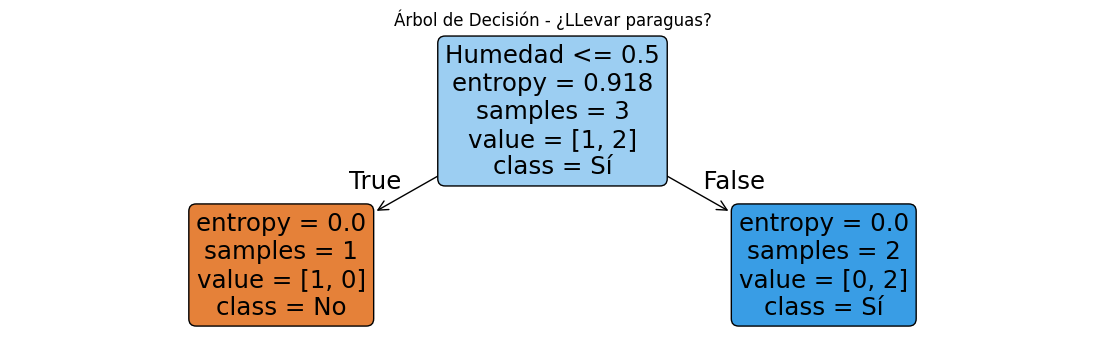

In [6]:
plt.figure(figsize=(14, 4))
plot_tree(
    modelo, 
    feature_names = ['Nublado', 'Humedad', 'Viento'],
    class_names = ['No', 'Sí'],
    filled = True,
    rounded = True
)
plt.title('Árbol de Decisión - ¿LLevar paraguas?')
plt.show()

### Predicciones

In [7]:
# Nublado: Sí=1, No=0
# Humedad: Alta=1, Normal: 0
# Viento: Sí=1, No=0
# [[Nublado, Humedad, Viento]]

try:
    nublado = int(input("¿Nublado? 1=Sí, 0=No"))
    humedad = int(input("¿Humedad? 1=Alta, 0=Normal"))
    viento = int(input("¿Viento? 1=Sí, 0=No"))

    nueva_prediccion = [[nublado, humedad, viento]]
    etiquetas_clima = ['Nublado', 'Humedad', 'Viento']

    prediccion = modelo.predict(nueva_prediccion)

    # Resultados finales de la predicción general
    print("\nPREDICCIÓN - ¿Debo llevar paraguas si...?\n")
    for clima, pred in zip(etiquetas_clima, nueva_prediccion[0]):
        print(f"{clima} -> {'Sí' if pred == 1 else 'No'}")
    print(f"\n¿Debo llevar paraguas? -> {prediccion[0]} ")
except ValueError:
    print("Solo se permiten números (1 ó 0)")


PREDICCIÓN - ¿Debo llevar paraguas si...?

Nublado -> Sí
Humedad -> Sí
Viento -> No

¿Debo llevar paraguas? -> Sí 


In [9]:
# Importancia de cada atributo

# feature_importances_: muestra la importancia de cada característica en el modelo. 
# Cuanto mayor sea el valor, más relevante es esa característica para las decisiones del árbol de decisión.

importancias = modelo.feature_importances_ 

print("\nImportancia de cada atributo\n")
for atributo, importancia in sorted(zip(['Nublado', 'Humedad', 'Viento'], importancias)):
    print(f"{atributo} -> {importancia}")


Importancia de cada atributo

Humedad -> 1.0
Nublado -> 0.0
Viento -> 0.0


#### Muestra la ganancia de información para cada atributo, ¿Qué atributo es más determinante?

In [10]:
#El atributo más determinante es "Humedad", ya que es el atributo con mayor ganancia de información, de acuerdo
# con la importancia de las características los restantes tienen cero.